In [1]:
'''
Decision Tree Classifier with Pre-Pruning and Post-Pruning
Pruning in decision trees is a technique used to reduce overfitting and improve model generalization.
It helps in removing unnecessary branches that do not contribute significantly to decision-making. 
There are two main types of pruning: Pre-Pruning and Post-Pruning.
'''

# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/KIIT/Downloads/cleaned_titanic_data.csv")
print(df.columns)

# Seperating Dependent and Independent data
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y=df[['Survived']]

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')


In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)

     Pclass        Age  SibSp  Parch      Fare  Gender
445       1   4.000000      0      2   81.8583       1
650       3  29.699118      0      0    7.8958       1
172       3   1.000000      1      1   11.1333       0
450       2  36.000000      1      2   27.7500       1
314       2  43.000000      1      1   26.2500       1
..      ...        ...    ...    ...       ...     ...
106       3  21.000000      0      0    7.6500       0
270       1  29.699118      0      0   31.0000       1
860       3  41.000000      2      0   14.1083       1
435       1  14.000000      1      2  120.0000       0
102       1  21.000000      0      1   77.2875       1

[623 rows x 6 columns]
     Pclass        Age  SibSp  Parch     Fare  Gender
709       3  29.699118      1      1  15.2458       1
439       2  31.000000      0      0  10.5000       1
840       3  20.000000      0      0   7.9250       1
720       2   6.000000      0      1  33.0000       0
39        3  14.000000      1      0  11.2417 

In [4]:
# Model building and fitting
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

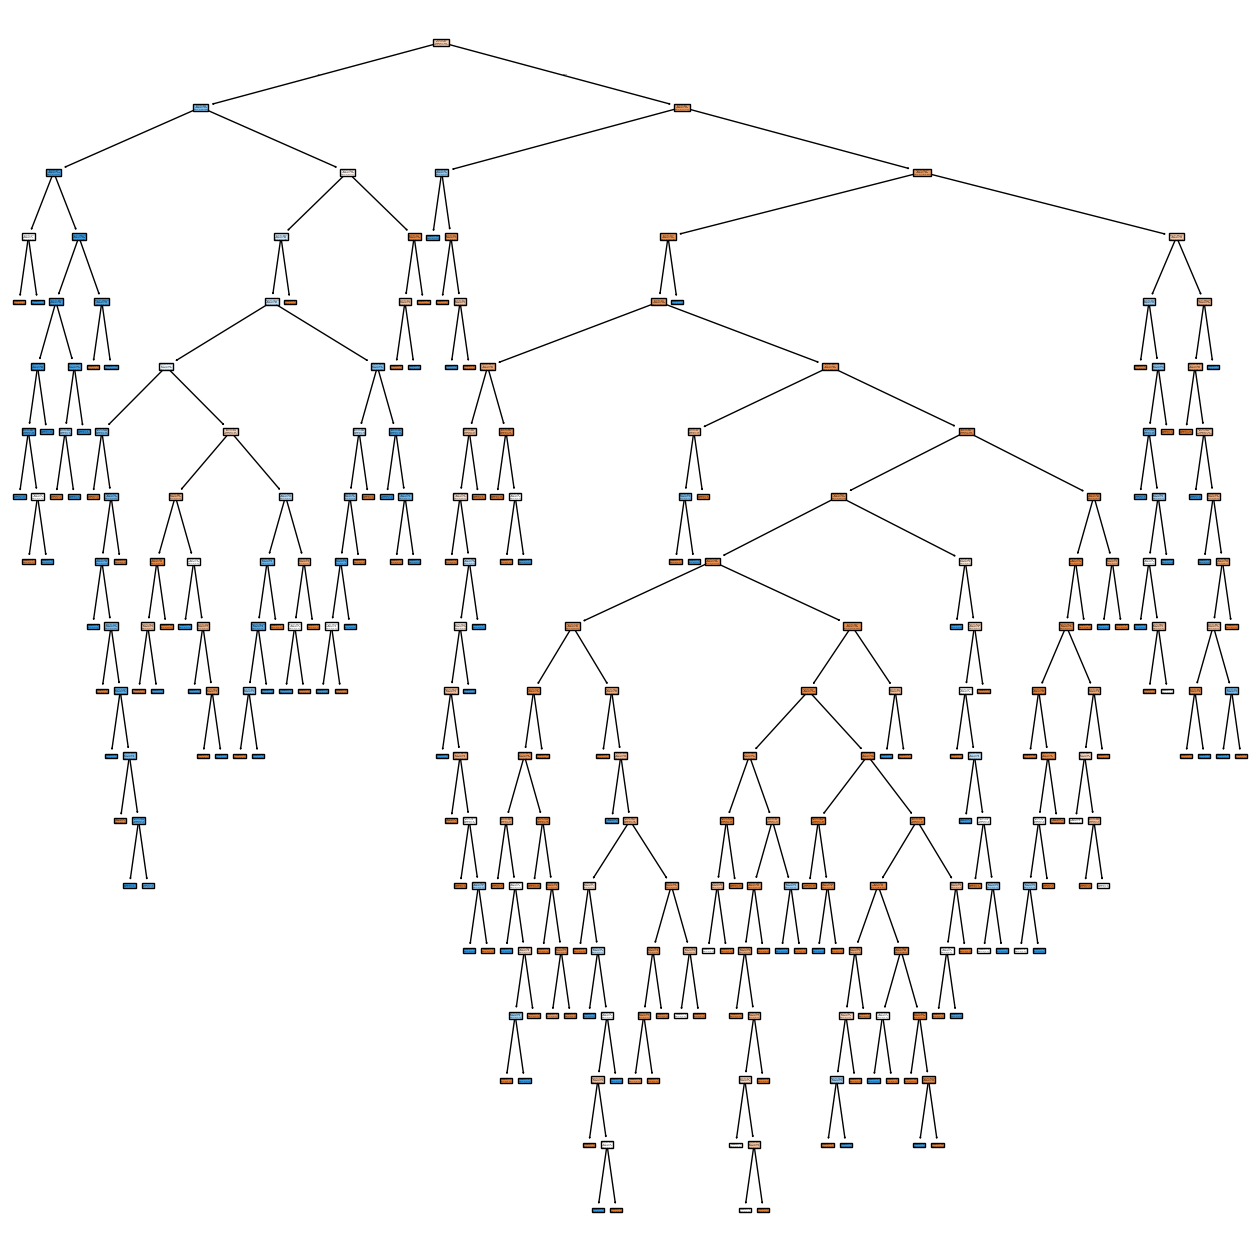

In [11]:
# Visualizing the decision tree
plt.figure(figsize=(16, 16))
tree.plot_tree(dtree, filled=True)
plt.show()

In [6]:
# Model evaluation
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [12]:
# Training evaluation
print("\nTraining Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation:
Accuracy: 0.9807383627608347
Confusion Matrix:
 [[391   1]
 [ 11 220]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       392
           1       1.00      0.95      0.97       231

    accuracy                           0.98       623
   macro avg       0.98      0.97      0.98       623
weighted avg       0.98      0.98      0.98       623



In [13]:
# Test evaluation
print("\nTest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation:
Accuracy: 0.7425373134328358
Confusion Matrix:
 [[126  31]
 [ 38  73]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       157
           1       0.70      0.66      0.68       111

    accuracy                           0.74       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [14]:
# Post-pruning: (limiting tree depth)
dtree = DecisionTreeClassifier(max_depth=2)

In [15]:
# Model training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

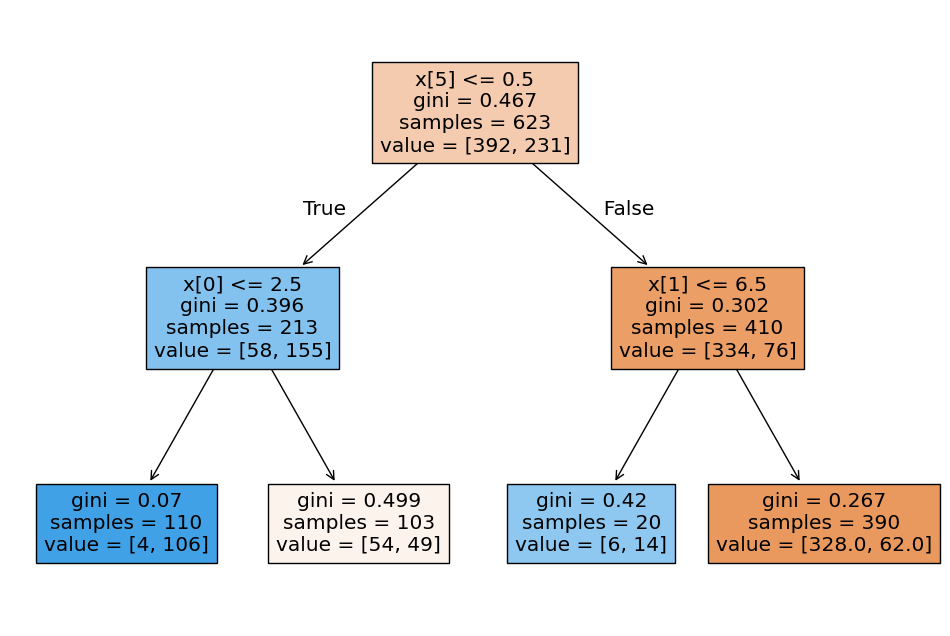

In [16]:
# Visualizing the pruned tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, filled=True)
plt.show()

In [17]:
# Model evaluation after pruning
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [18]:
# Training evaluation after pruning
print("\nTraining Evaluation (Post-pruning):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation (Post-pruning):
Accuracy: 0.8057784911717496
Confusion Matrix:
 [[382  10]
 [111 120]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       392
           1       0.92      0.52      0.66       231

    accuracy                           0.81       623
   macro avg       0.85      0.75      0.76       623
weighted avg       0.83      0.81      0.79       623



In [19]:
# Test evaluation after pruning
print("\nTest Evaluation (Post-pruning):")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation (Post-pruning):
Accuracy: 0.7723880597014925
Confusion Matrix:
 [[150   7]
 [ 54  57]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.51      0.65       111

    accuracy                           0.77       268
   macro avg       0.81      0.73      0.74       268
weighted avg       0.80      0.77      0.76       268



In [20]:
# Pre-Pruning: Limiting the complexity of the tree

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(parameters)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2']}


In [21]:
dtree = DecisionTreeClassifier(
    max_depth=3,                  # Limit tree depth
    min_samples_split=4,          # Minimum samples to split
    min_samples_leaf=2,           # Minimum samples in a leaf node
    max_leaf_nodes=10,            # Maximum number of leaf nodes
    max_features=3                # Maximum number of features used for splitting
)

grid=GridSearchCV(
    dtree,
    param_grid=parameters,
    cv=5,
    scoring= 'accuracy',
    verbose=3
)


In [22]:
# Model training
grid.fit(X_train,y_train)
dtree.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

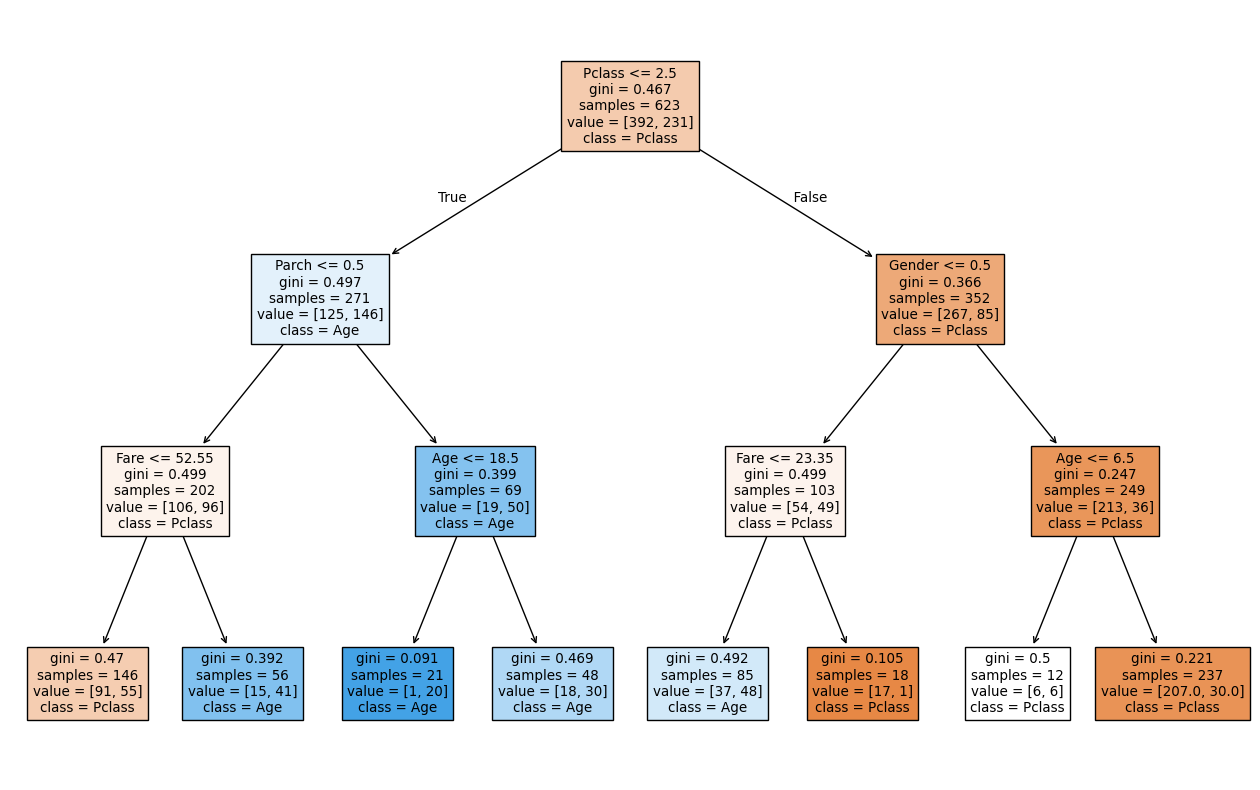

In [27]:
# Visualizing the pruned decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'Survived'])
plt.show()

In [28]:
# Model evaluation
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [29]:
# Training evaluation
print("\nTraining Evaluation (Pre-Pruning):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation (Pre-Pruning):
Accuracy: 0.7383627608346709
Confusion Matrix:
 [[321  71]
 [ 92 139]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       392
           1       0.66      0.60      0.63       231

    accuracy                           0.74       623
   macro avg       0.72      0.71      0.71       623
weighted avg       0.73      0.74      0.74       623



In [30]:
# Test evaluation
print("\nTest Evaluation (Pre-Pruning):")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation (Pre-Pruning):
Accuracy: 0.75
Confusion Matrix:
 [[132  25]
 [ 42  69]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       157
           1       0.73      0.62      0.67       111

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268

